In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Created DB path and connection
engine = create_engine(f"sqlite:///hawaii.sqlite")
conn = engine.connect()

In [3]:
print(engine.table_names())

['measurement', 'station']


In [4]:
#12 month precipitation query, ordered by date(ascending)
per_month_query = """
            SELECT
                date,
                prcp,
                tobs
            FROM
                measurement 
            WHERE
                date >= '2016-08-01' and date <= '2017-12-31'
            ORDER BY
                date DESC 
        """

In [5]:
monthly_df = pd.read_sql(per_month_query, conn)

In [6]:
#Fix DF to display plot
prcpAvg = monthly_df['prcp'].mean()
monthly_df['date'] = pd.to_datetime(monthly_df['date'])
monthly_df["prcp"] = monthly_df["prcp"].fillna(prcpAvg)

In [7]:
monthly_df

,date,prcp,tobs
0,2017-08-23,0.000000,81.0
1,2017-08-23,0.000000,82.0
2,2017-08-23,0.080000,82.0
3,2017-08-23,0.450000,76.0
4,2017-08-22,0.000000,82.0
...,...,...,...
2367,2016-08-01,2.350000,76.0
2368,2016-08-01,0.182896,78.0
2369,2016-08-01,0.540000,77.0
2370,2016-08-01,3.530000,76.0


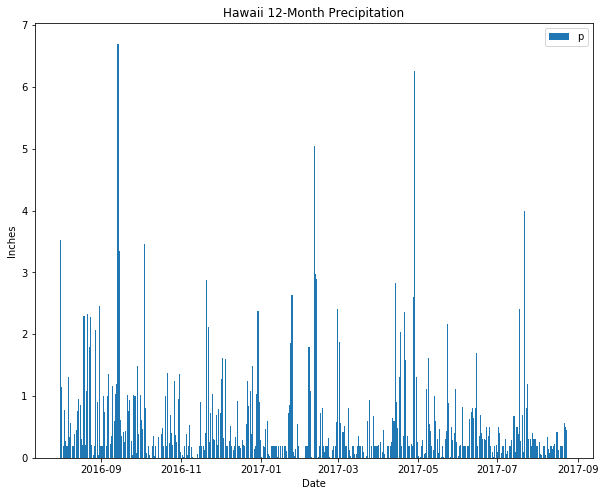

In [8]:
plt.figure(figsize=(10,8))
plt.bar(monthly_df['date'],monthly_df['prcp'])
plt.title("Hawaii 12-Month Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend("precipitation")
plt.show()

In [9]:
#SQL Query to combine both tables and narrow data to 15 days ordered by date(ascending)
query = """
            SELECT
                m.station,
                s.name,
                s.latitude,
                s.longitude,
                s.elevation,
                m.prcp,
                m.tobs,
                m.date
            FROM
                measurement m
                join station s on m.station = s.station
            WHERE
                m.date >= '2017-03-20' and m.date <= '2017-04-04'
            ORDER BY
                m.date asc
        """

In [10]:
vaca_df = pd.read_sql(query, conn)
vaca_df

,station,name,latitude,longitude,elevation,prcp,tobs,date
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00,75.0,2017-03-20
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.00,72.0,2017-03-20
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,NaN,77.0,2017-03-20
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00,75.0,2017-03-20
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.02,69.0,2017-03-20
...,...,...,...,...,...,...,...,...
94,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.00,76.0,2017-04-04
95,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00,75.0,2017-04-04
96,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00,78.0,2017-04-04
97,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.09,67.0,2017-04-04


In [11]:
#Total Number of stations
count_station_query = """
                    SELECT
                        count(station)
                    FROM 
                        station
                    """


In [12]:
count_df = pd.read_sql(count_station_query, conn)

In [13]:
count_df

,count(station)
0,9


In [14]:
#Most active stations in descending order
station_activity_query = """
                        SELECT  
                            station,
                            count(station)
                        FROM
                            measurement 
                        GROUP BY
                            station
                        ORDER BY 
                            count(station) desc
                        """

In [15]:
activity_df = pd.read_sql(station_activity_query, conn)

In [16]:
activity_df

,station,count(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


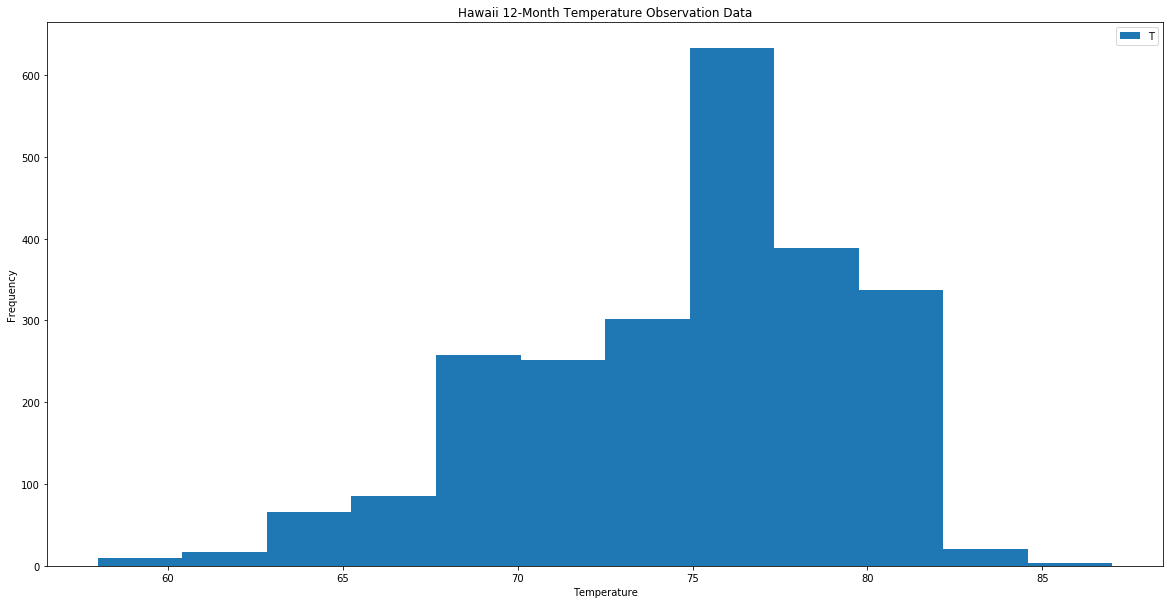

In [17]:
#Temperature observation data
plt.figure(figsize=(20,10))
plt.hist(monthly_df['tobs'],bins=12)
plt.title("Hawaii 12-Month Temperature Observation Data")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("Tobs")
plt.show()

In [18]:
#Close connection after completing queries. ALWAYS!
conn.close()